In [4]:
import pickle

with open("dump.pkl", 'rb') as f:
    graphs = pickle.load(f)
    
sizes = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
attempts = 25

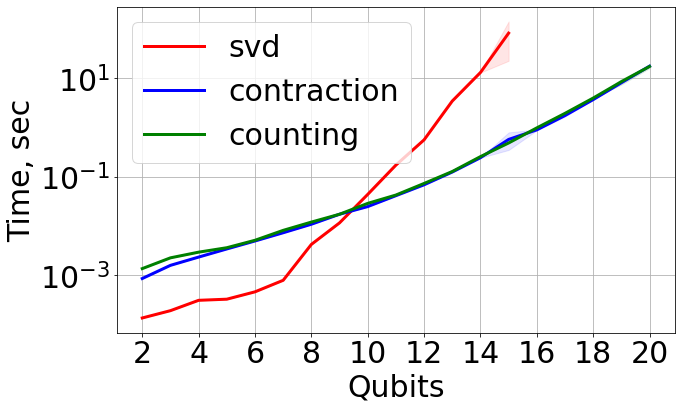

In [11]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 30


# graphs = {"svd" : svd_results, "contraction": contraction_results, "counting": counting_results}
colors = ['red', 'blue', 'green']

plt.figure(figsize=(10, 6))

for g, graph in enumerate(graphs):
    low, c, high = [], [], []

    for i in sizes:
        if i not in graphs[graph]: continue
        
        times = [x['separate_time'] + x['search_time'] for x in graphs[graph][i]]
        avg = (sum(times) - min(times) - max(times)) / (len(times) - 2)
        std = (
                sum([(t - avg) ** 2 for t in times])
                    - (max(times) - avg) ** 2 
                    - (min(times) - avg) ** 2
                ) / (len(times) - 2) ** .5
        c.append(avg)
        low.append(avg - std)
        high.append(avg + std)

    plt.plot(sizes[:len(c)], c, color=colors[g], label=graph, lw=3)
    plt.fill_between(sizes[:len(c)], low, high, color=colors[g], alpha=.1)


plt.xlabel("Qubits")
plt.ylabel("Time, sec")
plt.xticks([x for x in sizes[:len(c)] if x % 2 == 0])
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

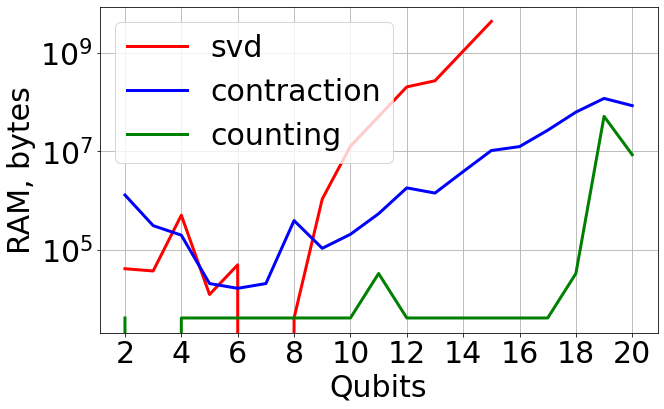

In [14]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 30


# graphs = {"svd" : svd_results, "contraction": contraction_results, "counting": counting_results}
colors = ['red', 'blue', 'green']

plt.figure(figsize=(10, 6))

for g, graph in enumerate(graphs):
    low, c, high = [], [], []
    for i in sizes:
        if i not in graphs[graph]: continue
        mems = [f['memory'] for f in graphs[graph][i]]
        avg = max(mems + [0])
        # std = sum([(m - avg) ** 2 for m in mems]) ** .5
        c.append(avg)
        # low.append(avg - std)
        # high.append(avg + std)

    plt.plot(sizes[:len(c)], c, color=colors[g], label=graph, lw=3)
    # plt.fill_between(sizes[:len(c)], low, high, color=colors[g], alpha=.1)

plt.xlabel("Qubits")
plt.ylabel("RAM, bytes")
plt.xticks([x for x in sizes[:len(c)] if x % 2 == 0])
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()